In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [2]:
data_root_orig = tf.keras.utils.get_file(origin='https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz',
                                         fname='notMNIST_small', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

/home/maxim/.keras/datasets/notMNIST_small


In [3]:
VALIDATION_SET_RATE = 0.05

# define image generators for train, validation and test set
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SET_RATE
)
image_generator

In [4]:
BATCH_SIZE = 32
IMG_HEIGHT = 28
IMG_WIDTH = 28
IMG_CHANNELS = 3
EPOCHS_COUNT = 5



train_data_gen = image_generator.flow_from_directory(directory=str(data_root),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='training')
STEPS_PER_EPOCH_TRAIN = np.ceil(train_data_gen.samples/BATCH_SIZE)

validation_data_gen = image_generator.flow_from_directory(directory=str(data_root),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='validation')

STEPS_PER_EPOCH_VALIDATION = np.ceil(validation_data_gen.samples/BATCH_SIZE)

Found 17794 images belonging to 10 classes.
Found 930 images belonging to 10 classes.


In [5]:
def load_image(filename, image_size):
    w, h = image_size
    # load the image
    img = load_img(filename, target_size=(w, h))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, w, h, 3)
    # center pixel data
    img = img.astype('float32')
    return img

In [6]:
# Define 1 input 2 conv and 1 fc layer with softmax output
input_layer = layers.Input(
    shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
    name='input'
)

conv_1 = layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu',
    name='conv_1'
)

conv_2 = layers.Conv2D(
    filters=40,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu',
    name='conv_2'
)

fc_1 = layers.Dense(128, activation='relu', name='fc_1')
out = layers.Dense(10, activation='softmax', name='output')

two_conv_model = keras.Sequential([
    input_layer,
    conv_1,
    conv_2,
    layers.Flatten(),
    fc_1,
    out
])
two_conv_model.summary()

# compile the model
two_conv_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 40)        5800      
_________________________________________________________________
flatten (Flatten)            (None, 31360)             0         
_________________________________________________________________
fc_1 (Dense)                 (None, 128)               4014208   
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 4,021,746
Trainable params: 4,021,746
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = two_conv_model.fit_generator(
    train_data_gen,
    validation_data=validation_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH_TRAIN,
    validation_steps=STEPS_PER_EPOCH_VALIDATION,
    epochs=EPOCHS_COUNT
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 557.0 steps, validate for 30.0 steps
Epoch 1/5
557/557 [==============================] - 14s 26ms/step - loss: 0.5924 - accuracy: 0.8401 - val_loss: 0.5472 - val_accuracy: 0.8355
Epoch 2/5
557/557 [==============================] - 15s 28ms/step - loss: 0.3552 - accuracy: 0.8978 - val_loss: 0.3554 - val_accuracy: 0.8968
Epoch 3/5
557/557 [==============================] - 16s 28ms/step - loss: 0.3046 - accuracy: 0.9108 - val_loss: 0.3342 - val_accuracy: 0.9043
Epoch 4/5
557/557 [==============================] - 15s 27ms/step - loss: 0.2643 - accuracy: 0.9223 - val_loss: 0.3197 - val_accuracy: 0.9140
Epoch 5/5
557/557 [==============================] - 15s 27ms/step - loss: 0.2290 - accuracy: 0.9323 - val_loss: 0.2962 - val_accuracy: 0.9140


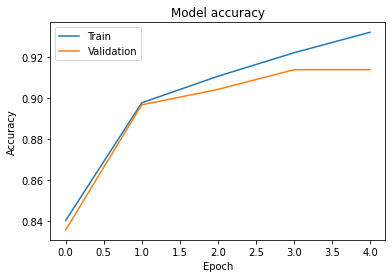

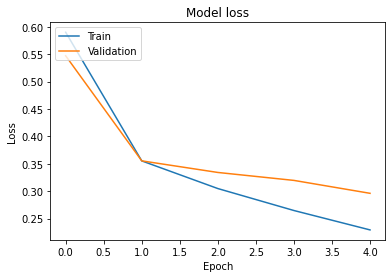

In model with 2 Conv layers max accuracy = 0.93233675


In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("In model with 2 Conv layers max accuracy = " + str(max(history.history['accuracy'])))

In [11]:
POOL_SIZE = 2

input_layer = layers.Input(
    shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
    name='input'
)

conv_1 = layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu',
    name='conv_1'
)

conv_2 = layers.Conv2D(
    filters=40,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu',
    name='conv_2'
)

fc_1 = layers.Dense(128, activation='relu', name='fc_1')
out = layers.Dense(10, activation='softmax', name='output')

pool_1 = layers.MaxPooling2D(
    pool_size=POOL_SIZE,
    name='pool_1'
)

model_with_pooling = keras.Sequential([
    input_layer,
    conv_1,
    pool_1,
    layers.Flatten(),
    fc_1,
    out
])

model_with_pooling.summary()
model_with_pooling.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 128)               401536    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 403,274
Trainable params: 403,274
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model_with_pooling.fit_generator(
    train_data_gen,
    validation_data=validation_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH_TRAIN,
    validation_steps=STEPS_PER_EPOCH_VALIDATION,
    epochs=EPOCHS_COUNT
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 557.0 steps, validate for 30.0 steps
Epoch 1/5
557/557 [==============================] - 5s 9ms/step - loss: 0.6172 - accuracy: 0.8355 - val_loss: 0.5165 - val_accuracy: 0.8538
Epoch 2/5
557/557 [==============================] - 5s 9ms/step - loss: 0.3960 - accuracy: 0.8946 - val_loss: 0.4480 - val_accuracy: 0.8753
Epoch 3/5
557/557 [==============================] - 5s 9ms/step - loss: 0.3538 - accuracy: 0.9017 - val_loss: 0.3903 - val_accuracy: 0.8892
Epoch 4/5
557/557 [==============================] - 5s 9ms/step - loss: 0.3255 - accuracy: 0.9078 - val_loss: 0.3773 - val_accuracy: 0.8946
Epoch 5/5
557/557 [==============================] - 5s 9ms/step - loss: 0.3022 - accuracy: 0.9149 - val_loss: 0.3489 - val_accuracy: 0.9011


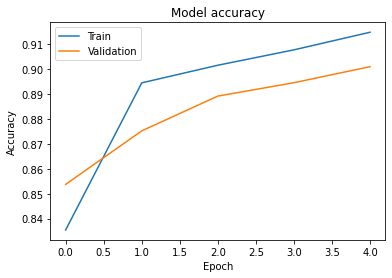

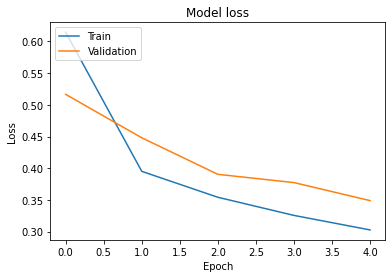

In model with 1 Conv layer and 1 Pooling layer max accuracy = 0.91491514


In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("In model with 1 Conv layer and 1 Pooling layer max accuracy = " + str(max(history.history['accuracy'])))

In [14]:
# Lets define classic LeNet-5 architecture

conv_lenet_1 = layers.Conv2D(
    filters=6,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='valid',
    activation='tanh',
    name='conv_lenet_1'
)

conv_lenet_2 = layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='valid',
    activation='tanh',
    name='conv_lenet_2'
)

conv_lenet_3 = layers.Conv2D(
    filters=120,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='valid',
    activation='tanh',
    name='conv_lenet_3'
)

pool_lenet_1 = layers.AveragePooling2D(
    pool_size=(2, 2),
    name='pool_lenet_1'
)

pool_lenet_2 = layers.AveragePooling2D(
    pool_size=(2, 2),
    name='pool_lenet_2'
)

fc_1 = layers.Dense(84, activation='tanh', name='fc_1')
out = layers.Dense(10, activation='softmax', name='output')

lenet5 = keras.Sequential([
    input_layer,
    conv_lenet_1,
    pool_lenet_1,
    conv_lenet_2,
    pool_lenet_2,
    conv_lenet_3,
    layers.Flatten(),
    fc_1,
    out
])
lenet5.summary()

lenet5.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lenet_1 (Conv2D)        (None, 26, 26, 6)         168       
_________________________________________________________________
pool_lenet_1 (AveragePooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv_lenet_2 (Conv2D)        (None, 11, 11, 16)        880       
_________________________________________________________________
pool_lenet_2 (AveragePooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv_lenet_3 (Conv2D)        (None, 3, 3, 120)         17400     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1080)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 84)               

In [16]:
history = lenet5.fit_generator(
    train_data_gen,
    validation_data=validation_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH_TRAIN,
    validation_steps=STEPS_PER_EPOCH_VALIDATION,
    epochs=EPOCHS_COUNT
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 557.0 steps, validate for 30.0 steps
Epoch 1/5
557/557 [==============================] - 4s 8ms/step - loss: 0.4132 - accuracy: 0.8809 - val_loss: 0.4581 - val_accuracy: 0.8710
Epoch 2/5
557/557 [==============================] - 5s 9ms/step - loss: 0.3963 - accuracy: 0.8843 - val_loss: 0.4378 - val_accuracy: 0.8763
Epoch 3/5
557/557 [==============================] - 5s 10ms/step - loss: 0.3803 - accuracy: 0.8891 - val_loss: 0.4183 - val_accuracy: 0.8839
Epoch 4/5
557/557 [==============================] - 5s 10ms/step - loss: 0.3662 - accuracy: 0.8918 - val_loss: 0.4089 - val_accuracy: 0.8796
Epoch 5/5
557/557 [==============================] - 6s 10ms/step - loss: 0.3530 - accuracy: 0.8963 - val_loss: 0.3945 - val_accuracy: 0.8796


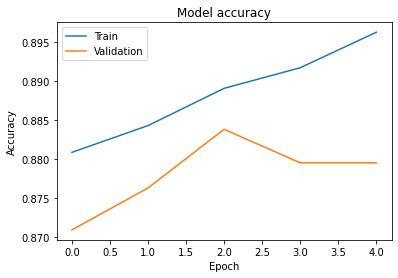

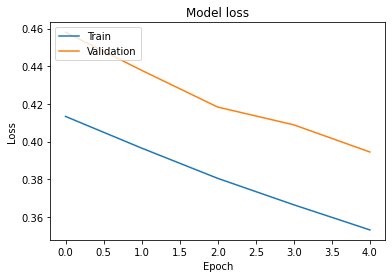

Lenet-5 has max accuracy = 0.89631337


In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Lenet-5 has max accuracy = " + str(max(history.history['accuracy'])))